<a href="https://colab.research.google.com/github/Lele237/-MachineLearning/blob/main/Data_viz_Ataques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# 1. Carregar Excel
df = pd.read_excel("Data_Breach_Chronology_sample.xlsx")

# 2. Converter colunas de datas e filtrar apenas 2024
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')
df_2024 = df[df['reported_date'].dt.year == 2024]

# 3. Remover entradas com informações ausentes relevantes
df_2024 = df_2024.dropna(subset=['org_name', 'breach_type'])

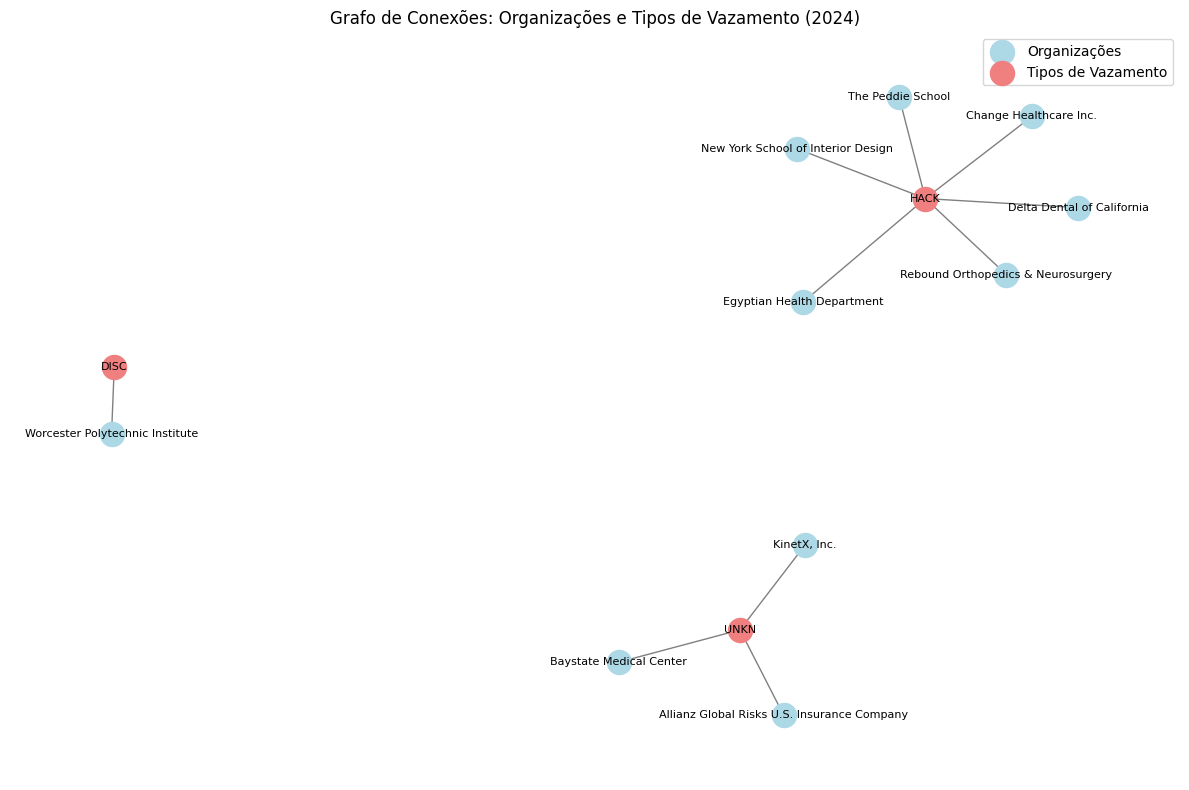

In [13]:
# 4. Criar grafo de organizações e tipo de vazamento
G = nx.Graph()

for _, row in df_2024.iterrows():
    org = row['org_name']
    breach = row['breach_type']
    G.add_node(org, type='organization')
    G.add_node(breach, type='breach')
    G.add_edge(org, breach)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
org_nodes = [n for n in G if G.nodes[n]['type'] == 'organization']
breach_nodes = [n for n in G if G.nodes[n]['type'] == 'breach']

nx.draw_networkx_nodes(G, pos, nodelist=org_nodes, node_color='lightblue', label='Organizações')
nx.draw_networkx_nodes(G, pos, nodelist=breach_nodes, node_color='lightcoral', label='Tipos de Vazamento')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Grafo de Conexões: Organizações e Tipos de Vazamento (2024)")
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# ==========================
# GRÁFICO SUNBURST
# ==========================
# Filtrar colunas importantes
sunburst_df = df_2024[['org_name', 'breach_type', 'total_affected']].dropna()

# Garantir que "total_affected" é numérico
sunburst_df['total_affected'] = pd.to_numeric(sunburst_df['total_affected'], errors='coerce').fillna(0)

# Criar gráfico Sunburst
fig_sunburst = px.sunburst(
    sunburst_df,
    path=['org_name', 'breach_type'],
    values='total_affected',
    title='Distribuição de Vazamentos por Organização e Tipo (2024)'
)

fig_sunburst.show()


In [17]:
#  Organizações Distintas por Mês e Ano:
# Converter coluna de data
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')

# Filtrar apenas registros com data válida
df = df.dropna(subset=['reported_date'])

# Criar colunas de ano e mês
df['year'] = df['reported_date'].dt.year
df['month'] = df['reported_date'].dt.month

# Agrupar por ano e mês: contar número de incidentes
monthly_by_year = df.groupby(['year', 'month']).size().reset_index(name='num_vazamentos')

# Gerar label "Ano-Mês" se quiser usar no eixo x
monthly_by_year['month_str'] = monthly_by_year['month'].apply(lambda m: f'{m:02d}')
monthly_by_year['ano_mes'] = monthly_by_year['year'].astype(str) + '-' + monthly_by_year['month_str']

# Criar gráfico de linha com cores por ano
fig = px.line(
    monthly_by_year,
    x='month',
    y='num_vazamentos',
    color='year',
    markers=True,
    labels={
        'month': 'Mês',
        'num_vazamentos': 'Número de Vazamentos',
        'year': 'Ano'
    },
    title='Comparação Mensal de Vazamentos por Ano'
)

fig.update_layout(xaxis=dict(tickmode='linear', tick0=1, dtick=1))
fig.show()
